In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
import glob
import numpy as np
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
sys.path.append('/home/jbane/headers')
import SQLFuncs as SQLF

plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

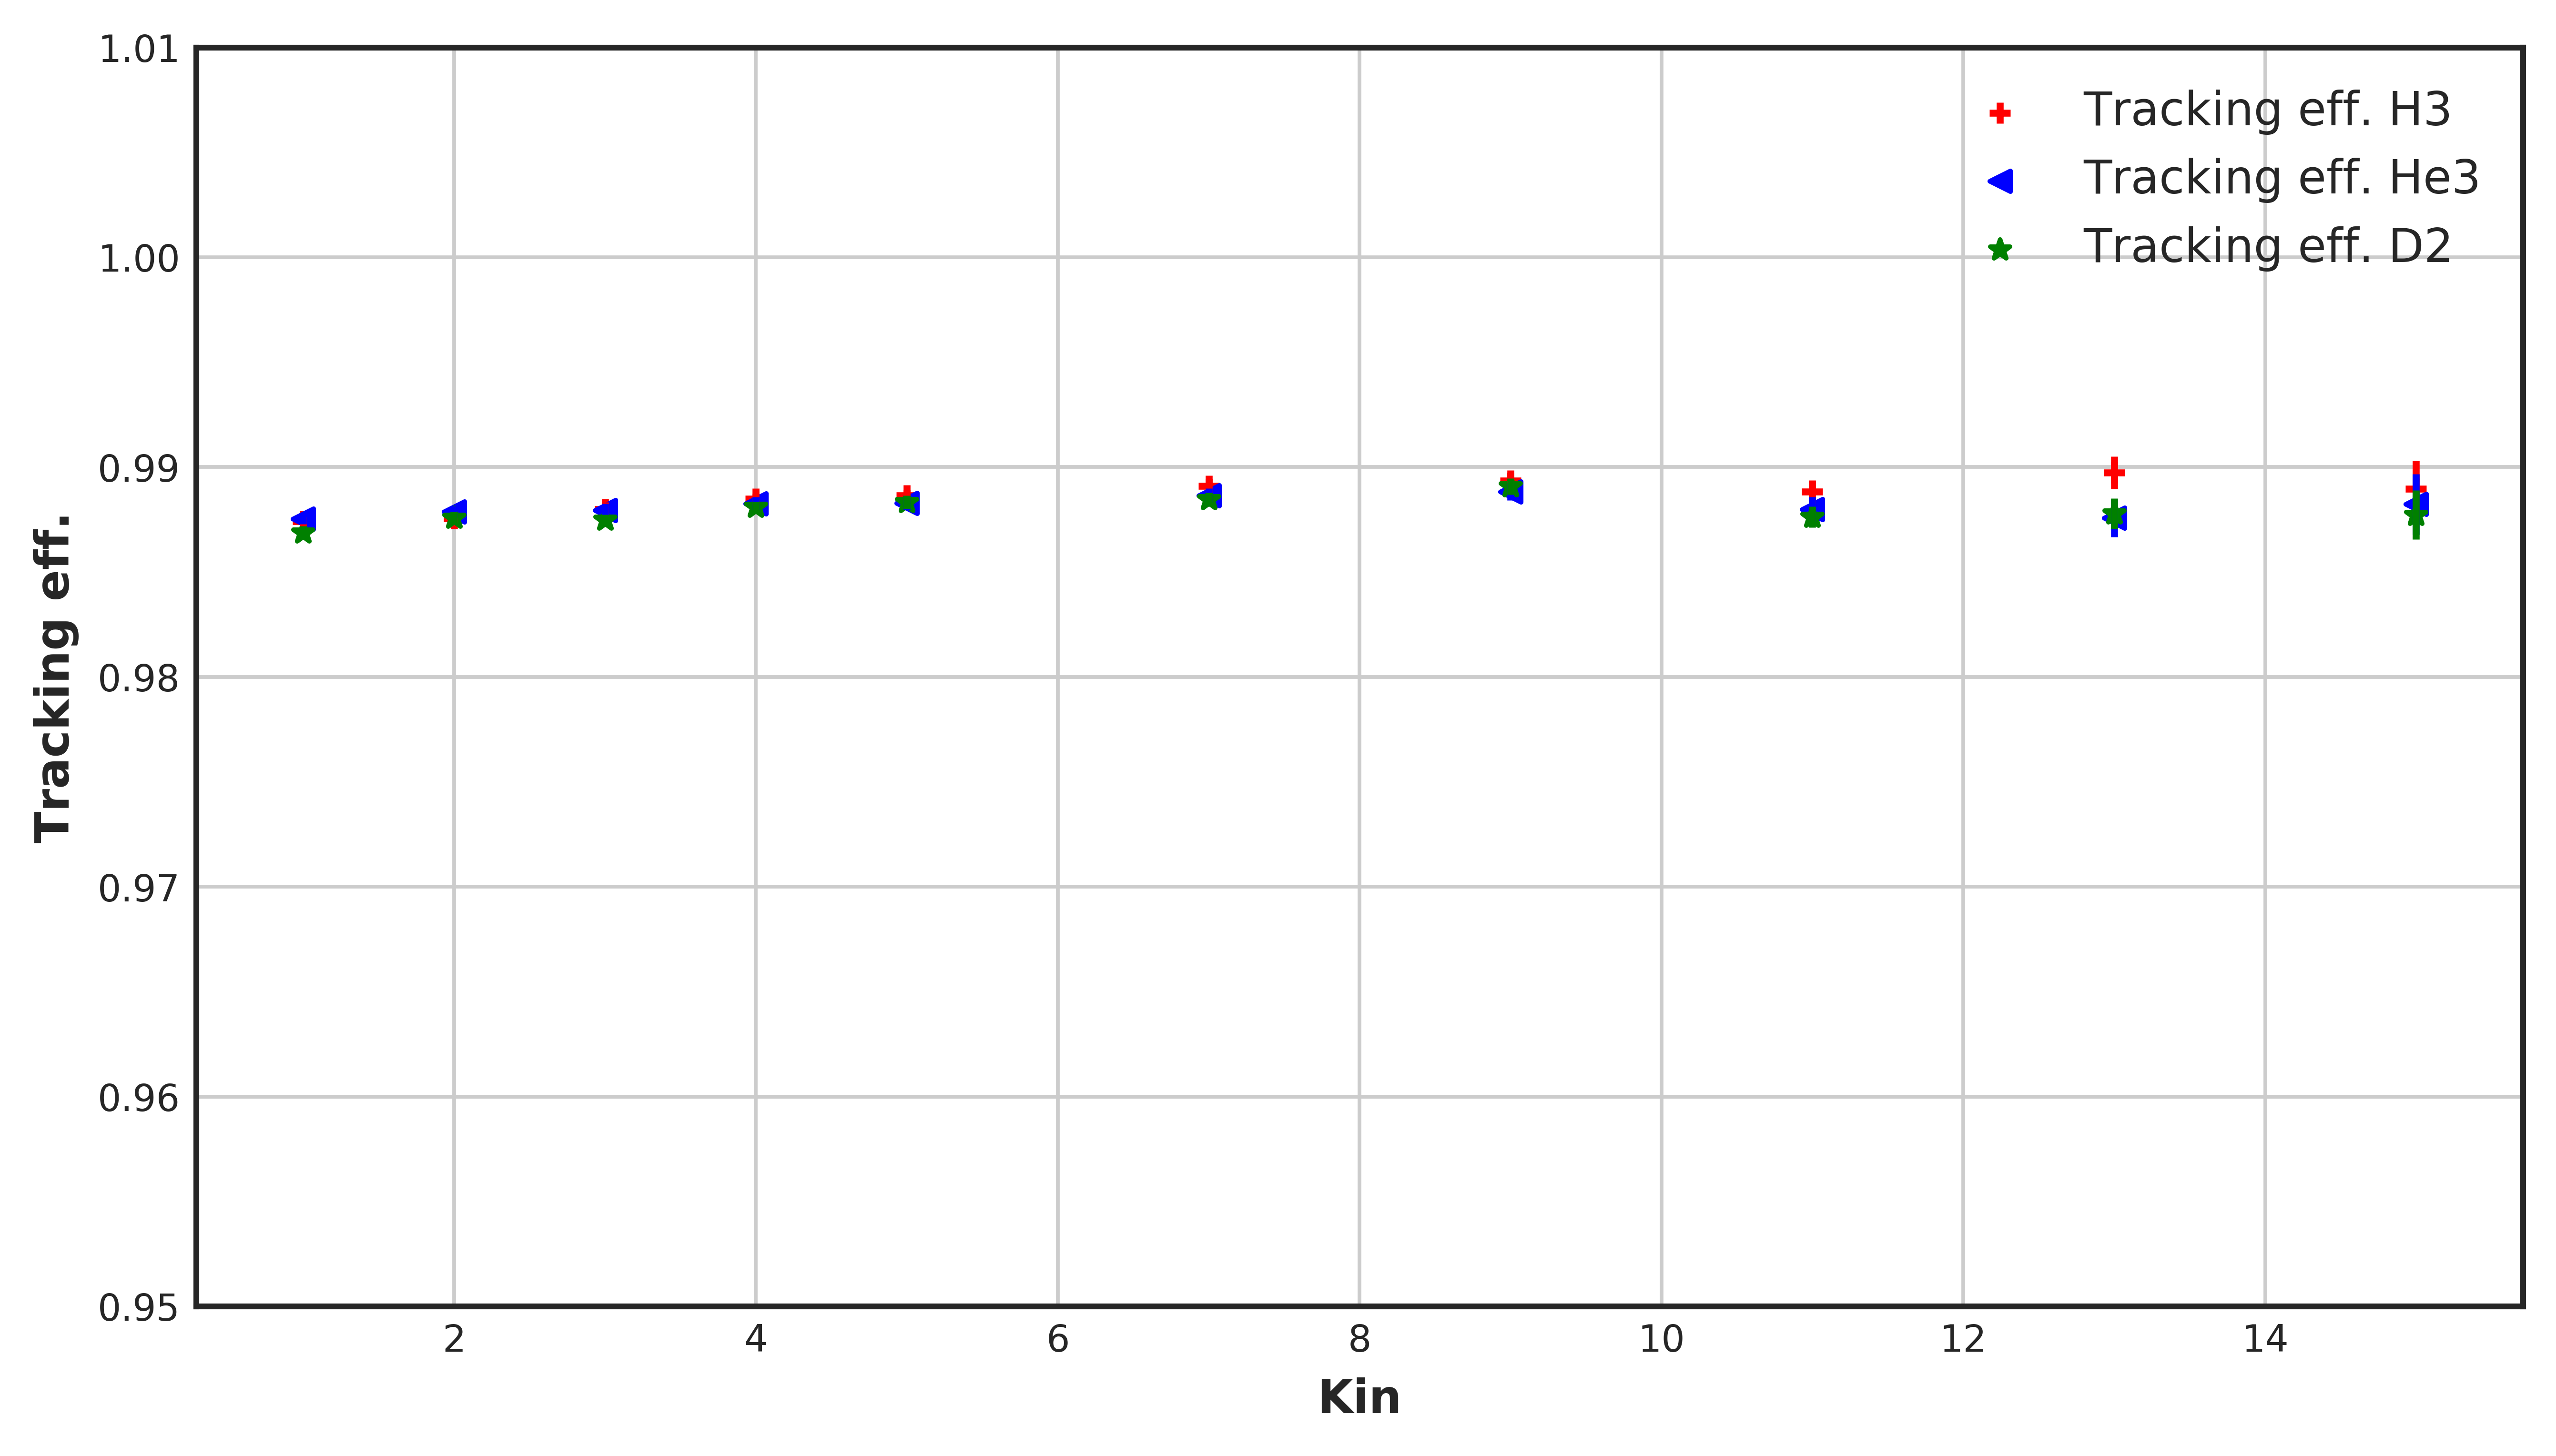

In [8]:
files = glob.glob("tracking_allkin_*.csv")
DF={}
index={1,2,3,4,5,7,9,11,13,15}
i=0

c=["r","b","g"]
m=["+","<","*"]
    

fig =plt.figure(dpi=700,figsize=(9,5))
ax =plt.subplot(1,1,1)
for file in files:
    if file.find("H.") > -1:
        continue
    DF[i]=pd.read_csv(file);
    DF[i]['Kin'] = index
    tgt=file.replace("tracking_allkin_","")
    tgt=tgt.replace(".csv","")
    
    
    DF[i].plot(ax=ax,y='Tracking_eff',x='Kin', kind='scatter',yerr="Tracking_err",c=c[i],marker=m[i], label="Tracking eff. {}".format(tgt))
    plt.ylim(0.95,1.01)
    plt.ylabel("Tracking eff.")
    plt.grid(True)
    i=i+1
    
fig.savefig("Tracking_Eff_allkin.eps",bbox_inches='tight')


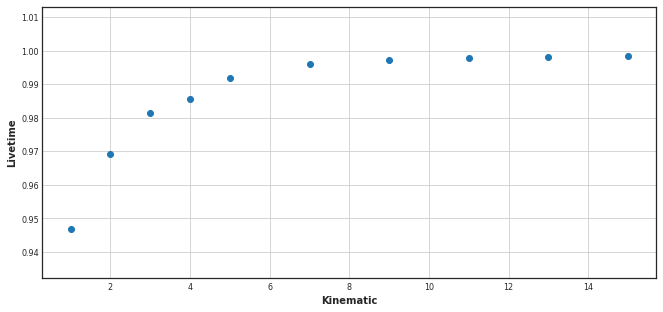

In [62]:
runlist = [1214,1242,1288,2579,1350,1371,1405,1493,1639,1862]
kins = [1,2,3,4,5,7,9,11,13,15]
LT=[]
fig=plt.figure(figsize=[11,5])
for run in runlist :
    LT.append(SQLF.SQL_LT(run))
plt.scatter(x=kins,y=LT,label="Livetime")
plt.grid("True")
plt.ylabel("Livetime")
plt.xlabel("Kinematic")

fig.savefig("/home/jbane/Thesis/images/DT_kin.eps",bbox_inches='tight')

a={"Kin":kins,"LiveTime":LT}
DF=pd.DataFrame.from_dict(a)
DF=DF.transpose().copy()
DF.to_csv("/home/jbane/Thesis/images/DT_kin.csv",float_format='%.3f',header =False)

In [42]:
SQLF.SQL_LT(1242)

0.969143

In [59]:
DF.drop

,0,1,2,3,4,5,6,7,8,9
Kin,1.000000,2.000000,3.000000,4.000000,5.000000,7.00000,9.000000,11.00000,13.000000,15.000000
LiveTime,0.946825,0.969143,0.981291,0.985589,0.991867,0.99609,0.997375,0.99775,0.998124,0.998474
